In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
def plot_conf_matrix(y_pred, y_true, title=None):
    """Helper Function to plot confustion matrix"""
    
    conf_mat = confusion_matrix(y_pred, y_true)
    df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Fake", "Real"]],
                  columns = [i for i in ["Fake", "Real"]])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cmap="Blues")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    if title:
        plt.title(f"{title} Confusion Matrix")
    plt.show()

# Read in Data and Preprocess

In [5]:
true_news_df = pd.read_csv("COVID19-FNIR/COVID19-FNIR/trueNews.csv")
fake_news_df = pd.read_csv("COVID19-FNIR/COVID19-FNIR/fakeNews.csv")
# Assign class columns and combine dataframes
fake_news_df["class"] = 0
true_news_df["class"] = 1
combined = pd.concat([fake_news_df, true_news_df], axis=0)

In [6]:
combined.shape

(7588, 15)

In [7]:
fake_news_df.shape

(3795, 12)

In [8]:
true_news_df.shape

(3793, 8)

In [9]:
# Subset data to just contain the text field and the class field
combined = combined[["Text", "class"]].reset_index(drop=True)
# Shuffle data
combined = combined.sample(frac = 1)

In [21]:
combined['Text'] = combined['Text'].str.replace('http\S+|www.\S+', '', case=False)
combined['Text'] = combined['Text'].str.replace('pic\S+|twitter.\S+', '', case=False)
combined['Text'] = combined['Text'].str.replace('#\S+', '', case=False)
combined['Text'] = combined['Text'].str.replace('@\S+', '', case=False)
combined['Text'] = combined['Text'].str.replace('Link:\S+', '', case=False)
combined['Text'] = combined['Text'].str.replace('[ \t]+$', '', case=False)
# remove front and ending blank spaces
combined = combined.replace({"^\s*|\s*$":""}, regex=True) 

string = string.replace(/\s\s+/g, ' ');

def wordopt(text):
    """Formating of the text field """
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

combined["Text"] = combined["Text"].apply(wordopt)

SyntaxError: invalid syntax (1076003711.py, line 10)

In [13]:
combined[combined["class"]==1].iloc[2]["Text"]

'the global death toll from covid  stands at more than'

In [14]:
# for i in range(1000):
#     print(f"{i}: {combined[combined['class']==0].iloc[i]['Text']}")

In [19]:
combined[combined["class"]==0].iloc[540]["Text"]

'george floyd s  murder  filmed before covid'

In [20]:
combined[combined["class"]==1].iloc[101]["Text"]

'no  accused of putting  brexit over breathing  in covid  ventilator row'

In [224]:
combined.head()

,Text,class
4844,new report highlights geographic differences ...,1
7506,govt changes strategy to fight against covid ...,1
2612,hot weather will stop the covid pandemic,0
735,spanish politician ortega smith said i prefer...,0
6649,uk employers should pay wages of those asked t...,1


In [226]:
# Set X and y variables
X = combined["Text"]
y = combined["class"]

In [227]:
# Split data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [228]:
from sklearn.feature_extraction.text import TfidfVectorizer

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 

vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
X_test = vectorization.transform(X_test)

# Model 1: Naive Bayes Model

In [229]:
from sklearn.naive_bayes import MultinomialNB


nb_model = MultinomialNB()
# Fit model 
nb_model.fit(X_train, y_train)
# Predict 
y_pred = nb_model.predict(X_test)

In [230]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.8892988929889298


In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       961
           1       0.88      0.89      0.89       936

    accuracy                           0.89      1897
   macro avg       0.89      0.89      0.89      1897
weighted avg       0.89      0.89      0.89      1897



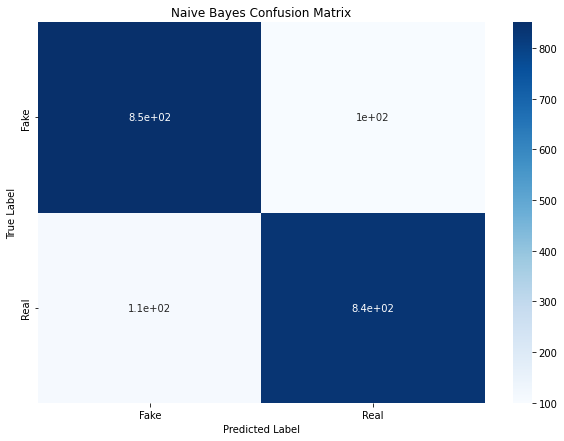

In [232]:
plot_conf_matrix(y_pred, y_test, title="Naive Bayes")

In [233]:
# 
params = {
    "alpha": [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1, 1.5, 2, 3, 5, 10],
    "fit_prior": (True, False),
}
gs_clf = GridSearchCV(MultinomialNB(), params, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

In [234]:
# gs_clf.cv_results_

In [235]:
y_pred = gs_clf.predict(X_test)

In [236]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.8914074855034264


In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       961
           1       0.89      0.89      0.89       936

    accuracy                           0.89      1897
   macro avg       0.89      0.89      0.89      1897
weighted avg       0.89      0.89      0.89      1897



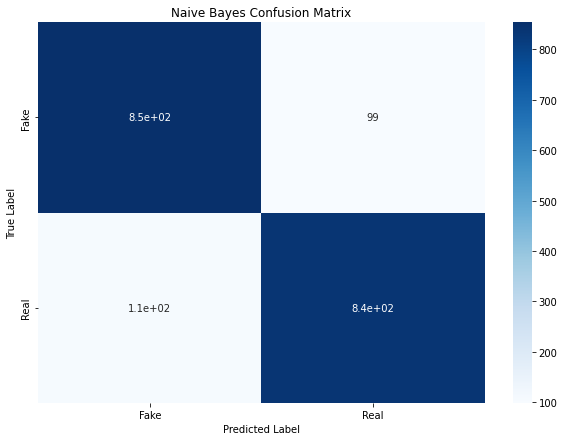

In [238]:
plot_conf_matrix(y_pred, y_test, title="Naive Bayes")

# Model 2: Gradient Boosting Classifier

In [239]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier()
# Fit model 
gbt_model.fit(X_train, y_train)
# Predict 
y_pred = gbt_model.predict(X_test)

In [240]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.8508170795993675


In [241]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       961
           1       0.83      0.87      0.85       936

    accuracy                           0.85      1897
   macro avg       0.85      0.85      0.85      1897
weighted avg       0.85      0.85      0.85      1897



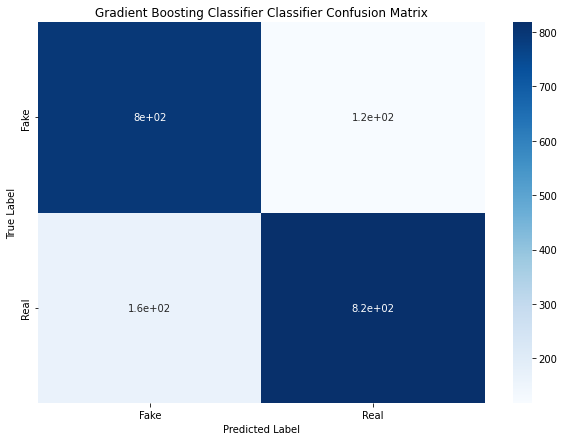

In [242]:
plot_conf_matrix(y_pred, y_test, title="Gradient Boosting Classifier Classifier")

In [243]:
%%time
params = {
    "loss": ["deviance", "exponential"],
    "learning_rate": [0.001, 0.01, 0.1, 1, 2],
    "n_estimators": [10, 50, 100],
    "subsample": [0.5, 0.75, 1.0],
}

gs_clf = GridSearchCV(GradientBoostingClassifier(), params, n_jobs=-1, scoring='accuracy', verbose=10)
  
gs_clf = gs_clf.fit(X_train, y_train)
# Predict 
y_pred = gs_clf.predict(X_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 3/90] START learning_rate=0.001, loss=deviance, n_estimators=10, subsample=1.0
[CV 1/5; 3/90] END learning_rate=0.001, loss=deviance, n_estimators=10, subsample=1.0;, score=0.827 total time=   0.5s
[CV 2/5; 5/90] START learning_rate=0.001, loss=deviance, n_estimators=50, subsample=0.75
[CV 2/5; 5/90] END learning_rate=0.001, loss=deviance, n_estimators=50, subsample=0.75;, score=0.839 total time=   2.1s
[CV 4/5; 7/90] START learning_rate=0.001, loss=deviance, n_estimators=100, subsample=0.5
[CV 4/5; 7/90] END learning_rate=0.001, loss=deviance, n_estimators=100, subsample=0.5;, score=0.831 total time=   3.8s
[CV 2/5; 10/90] START learning_rate=0.001, loss=exponential, n_estimators=10, subsample=0.5
[CV 2/5; 10/90] END learning_rate=0.001, loss=exponential, n_estimators=10, subsample=0.5;, score=0.825 total time=   0.3s
[CV 4/5; 10/90] START learning_rate=0.001, loss=exponential, n_estimators=10, subsample=0.5
[CV 4/

In [246]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.8687401159725883


In [247]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       961
           1       0.86      0.87      0.87       936

    accuracy                           0.87      1897
   macro avg       0.87      0.87      0.87      1897
weighted avg       0.87      0.87      0.87      1897



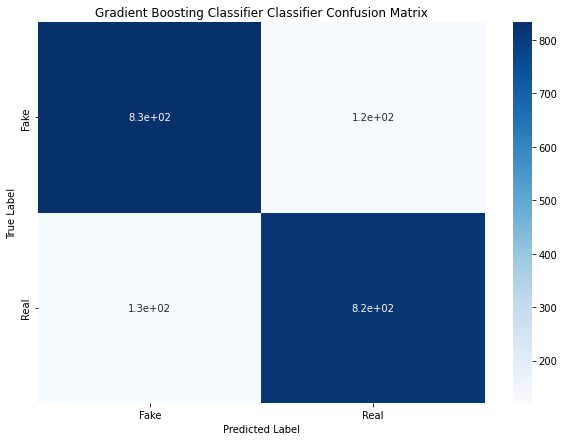

In [248]:
plot_conf_matrix(y_pred, y_test, title="Gradient Boosting Classifier Classifier")

# Model 3: Random Forest Classifier

In [249]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
# Fit model 
rf_model.fit(X_train, y_train)
# Predict 
y_pred = rf_model.predict(X_test)

In [250]:
params = {
    "n_estimators": [10, 50, 100, 200],
    "min_samples_leaf": [1, 2, 4],
}
gs_clf = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)
# Predict 
y_pred = gs_clf.predict(X_test)

In [251]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.9109119662625198


In [252]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       961
           1       0.90      0.92      0.91       936

    accuracy                           0.91      1897
   macro avg       0.91      0.91      0.91      1897
weighted avg       0.91      0.91      0.91      1897



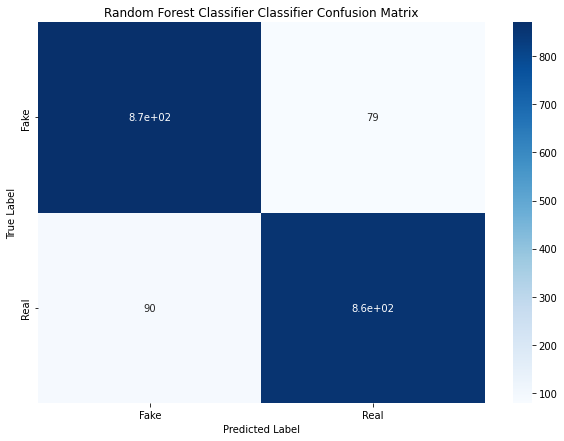

In [253]:
plot_conf_matrix(y_pred, y_test, title="Random Forest Classifier Classifier")

# LSTM